### Projet Monte Carlo - ABC for alpha-stable models
## Zakaria BOULIAIRE, Clémence CHEVRIER, Félix DE CHAMPS DE SAINT LEGER, Enzo LOUNES

## 1. Import des modules nécessaires

In [35]:
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import levy_stable
from scipy.stats import qmc
import seaborn as sns

On fixe la graine pour assurer la reproductibilité des résultats. 

In [36]:
np.random.seed(124)

Premièrement, regardons à quoi ressemble une distribution alpha-stable.

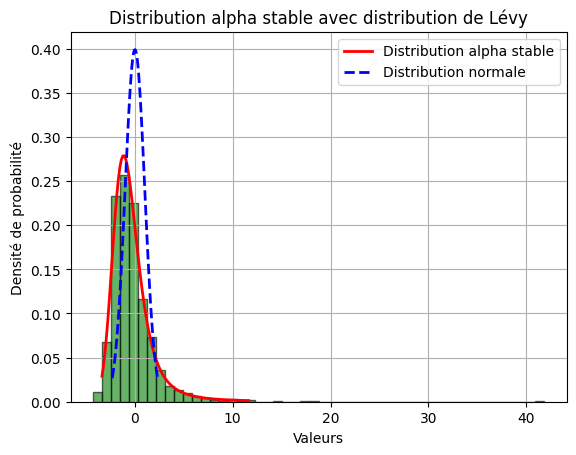

In [37]:
# Paramètres de la distribution alpha stable avec distribution de Lévy
alpha = 1.5  # Paramètre alpha (0 < alpha <= 2 pour la distribution de Lévy)
beta = 1   # Paramètre beta (-1 <= beta <= 1)
loc = 0.0    # Paramètre de position (moyenne de la distribution)
scale = 1.0  # Paramètre d'échelle (écart-type de la distribution)

# Génération d'échantillons à partir de la distribution alpha stable avec distribution de Lévy
n = 1000
samples = levy_stable.rvs(alpha, beta, loc=loc, scale=scale, size=n)

# Tracer l'histogramme des échantillons
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')

# Tracer la densité de probabilité théorique de la distribution alpha-stable
x_alpha = np.linspace(levy_stable.ppf(0.01, alpha, beta, loc=loc, scale=scale),
                levy_stable.ppf(0.99, alpha, beta, loc=loc, scale=scale), 100)
plt.plot(x_alpha, levy_stable.pdf(x_alpha, alpha, beta, loc=loc, scale=scale), 'r-', lw=2, label='Distribution alpha stable')

# Génération d'échantillons à partir d'une distribution normale pour la superposition
mu, sigma = loc, scale  # Utilisation des mêmes paramètres de position et d'échelle que la distribution alpha-stable
samples_norm = np.random.normal(mu, sigma, n)

# Tracer la densité de probabilité de la distribution normale
x_norm = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
plt.plot(x_norm, norm.pdf(x_norm, mu, sigma), 'b--', lw=2, label='Distribution normale')

plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.title('Distribution alpha stable avec distribution de Lévy')
plt.grid(True)
plt.legend()
plt.show()


On voit que la distribution alpha-stable possède une asymétrie, et une queue plus lourde que la loi normale par exemple. 

## Question 1 : Implement the generator for alpha-stable distributions proposed in Appendix B, and explain why it is valid

# 1.1. Echantillonnage de W à partir d'une distribution exponentielle

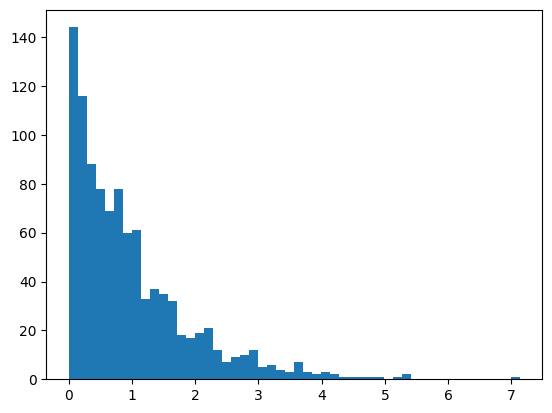

In [38]:
np.random.seed(124)
w = np.random.standard_exponential(size=n)
plt.hist(w, bins=50)
plt.show()

# 1.2. Echantillonnage de U à partir d'une distribution uniforme

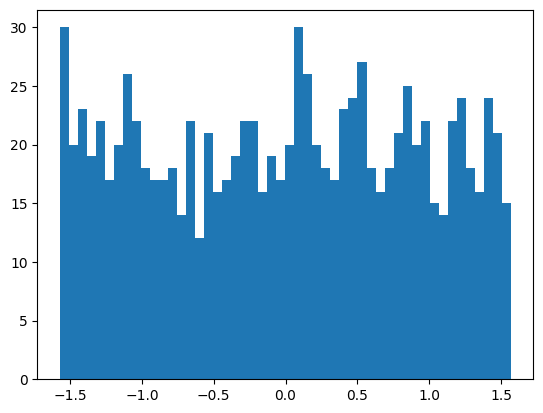

In [39]:
np.random.seed(124)
u = np.random.uniform(low = -np.pi/2, high = np.pi/2, size = n)
plt.hist(u, bins = 50)
plt.show()

# 1.3. Appliquer la transformation pour obtenir l'échantillon y_barre

In [40]:
np.random.seed(124)
u = np.random.uniform(low = -np.pi/2, high = np.pi/2, size = n)
w = np.random.standard_exponential(size=n)
n=1000
# On définit en premier lieu les S et B pour plus de clarté
def S(alpha, beta): 
    tan_term = np.tan(np.pi * alpha / 2)**2
    result = (1 + beta**2 * tan_term)**(1 / (2 * alpha))
    return result

def B(alpha, beta):
    tan_term = beta * np.tan(np.pi * alpha / 2)
    result = 1 / alpha * np.arctan(tan_term)
    return result

def calculate_y_barre(alpha, beta, u, w):
    if alpha != 1:
        S_alpha_beta = S(alpha, beta)
        B_alpha_beta = B(alpha, beta)
        sin_alpha = np.sin(alpha)
        cos_u = np.cos(u)
        term1 = S_alpha_beta * (sin_alpha * (u + B_alpha_beta))
        term2 = (cos_u) ** (1 / alpha)
        term3 = np.cos(u - alpha * (u + B_alpha_beta)) / w
        term4 = ((1 - alpha) / alpha)
        y_barre = (term1 / term2) * np.sign(term3)* (np.abs(term3) ** term4)
    else:
        term1 = (np.pi / 2 + beta * u) * np.tan(u)
        term2 = beta * np.log((np.pi / 2) * w * np.cos(u) / (np.pi / 2 + beta * u))
        y_barre = 2 / np.pi * (term1 - term2)
    return y_barre

print(calculate_y_barre(0.6,1,u,w))

[1.54635696e+00 5.37901294e+00 1.53462996e+00 1.21638391e+00
 2.39282986e+00 6.67839575e-01 3.28207636e+00 8.32124533e-01
 2.60243744e+00 4.63996180e+01 4.80735706e+00 8.41663505e-01
 2.14651837e+00 2.33028406e+02 3.60301168e+00 1.10675725e+00
 4.12906987e+00 1.08628913e+01 1.93599057e+00 1.69808258e+01
 2.60793353e+00 1.35363431e+00 7.24726263e+00 2.50046580e+00
 1.59010440e+00 2.40221624e+00 2.15931165e+00 6.00208562e+02
 7.62166232e+01 3.70278653e+02 8.47986798e-01 6.86315009e-01
 2.52802552e+00 1.71638065e+00 1.58660191e+00 9.39654614e+00
 1.08853266e+00 1.29615217e+00 3.55049464e+00 4.10126734e+01
 9.72978316e-01 4.42875038e+00 1.01667377e+00 1.53887809e+00
 2.87150947e+00 5.64288497e+01 2.95835130e+02 5.19699386e+00
 3.55665805e+00 5.93653780e+00 1.19894386e+00 9.94068784e+00
 8.69236674e-01 6.99758652e+00 6.80619653e-01 1.21978077e+01
 9.76146138e+00 7.61380327e+00 6.04345362e-01 9.08989664e+00
 1.12359002e+00 2.04171445e+00 6.73891588e+00 4.72083895e-01
 4.66235398e+00 1.253105

# 1.4. On applique une nouvelle transformation pour obtenir y

In [41]:
def transformation(alpha, beta, gamma, delta, u, w):
    y_barre = calculate_y_barre(alpha, beta, u, w)
    y = gamma * y_barre + delta
    return y

print(transformation(0.6,1,1,0,u,w))

[1.54635696e+00 5.37901294e+00 1.53462996e+00 1.21638391e+00
 2.39282986e+00 6.67839575e-01 3.28207636e+00 8.32124533e-01
 2.60243744e+00 4.63996180e+01 4.80735706e+00 8.41663505e-01
 2.14651837e+00 2.33028406e+02 3.60301168e+00 1.10675725e+00
 4.12906987e+00 1.08628913e+01 1.93599057e+00 1.69808258e+01
 2.60793353e+00 1.35363431e+00 7.24726263e+00 2.50046580e+00
 1.59010440e+00 2.40221624e+00 2.15931165e+00 6.00208562e+02
 7.62166232e+01 3.70278653e+02 8.47986798e-01 6.86315009e-01
 2.52802552e+00 1.71638065e+00 1.58660191e+00 9.39654614e+00
 1.08853266e+00 1.29615217e+00 3.55049464e+00 4.10126734e+01
 9.72978316e-01 4.42875038e+00 1.01667377e+00 1.53887809e+00
 2.87150947e+00 5.64288497e+01 2.95835130e+02 5.19699386e+00
 3.55665805e+00 5.93653780e+00 1.19894386e+00 9.94068784e+00
 8.69236674e-01 6.99758652e+00 6.80619653e-01 1.21978077e+01
 9.76146138e+00 7.61380327e+00 6.04345362e-01 9.08989664e+00
 1.12359002e+00 2.04171445e+00 6.73891588e+00 4.72083895e-01
 4.66235398e+00 1.253105

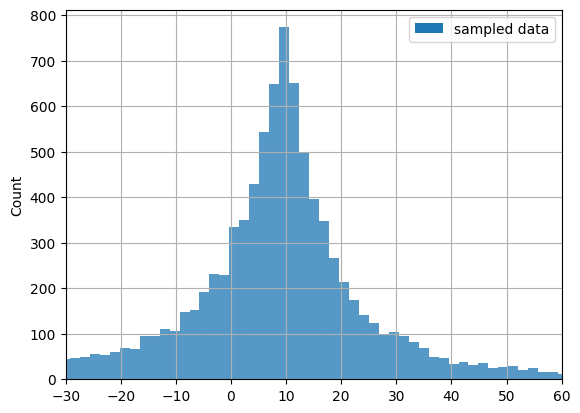

In [42]:
size=10000
u = np.random.uniform(low = -np.pi/2, high = np.pi/2, size = size)
w = np.random.standard_exponential(size=size)
x = transformation(1.7,0.9,10,10,u,w)
plt.hist(x, bins='auto', density=True,  label="sampled data")
sns.histplot(x, bins='auto')  # kde=True pour tracer la densité
plt.xlim(-30,60)
plt.grid()
plt.legend()
plt.show()

On voit bien les queues lourdes de distribution.

Ainsi, on a implémenté un générateur de distributions alpha-stables. Ce générateur est valide car les distributions alpha-stables sont caractérisées par leur fonction caractéristique puisqu'elles n'ont pas de closed form pour leur densité de probabilité. De plus, il y a une transformation qui invoque les variables auxiliaires U et W. Aussi, les sommes de variables aléatoires à queues lourdes tendent vers une distribution stable. Alors, si les paramètres alpha, beta, gamma, et delta sont dans leurs domaines respectifs, le générateur sera valide. 

## Question 2 : Explain how you could modify this generator to use RQMC sequences in order to approximate expectations under an alpha-stable distribution. Implement this for a certain function, and compare the resulting RQMC estimates with standard Monte Carlo estimates. (Careful: again, an alpha-stable distribution is typically heavy-tailed, make sure you choose a function whose variance is finite. . . ).

Pour modifier ce générateur pour utiliser des séquences QMC pour approximer les expectations avec une distribution alpha-stable, on peut d' abord chosir une séquence RQMC comme celle de Sobol, Halton ou Faure qui sont présentées dans l'article. Nous choisirons Sobol. En effet, ces séquences sont conçues pour être semi-aleatoires, et couvrir l'espace de manière plus optimale. Ensuite, on pourra modifier le générateur pour utiliser les valeurs de la séquence RQMC à la place des valeurs aléatoires précédemment utilisées. Alors, la convergence vers l'estimation de l'esperance sera plus rapide. Ensuite, on compare avec les estimations Monte Carlo standard.

Définition des fonctions de variance finie.

In [43]:
def f1(x):
    return x

def f2(x):
    return np.exp(-x**2)

def f3(x):
    return x**2 + x + 1

def f4(x):
    return np.sin(x)

### 2.1 Sobol

Codons la partie sur la séquence de Sobol.

In [44]:
np.random.seed(124)
def sobol_sequence(n, d):
    sobol = qmc.Sobol(d)
    points = sobol.random(n)
    return points

print(sobol_sequence(2,3))

[[0.54770166 0.13121259 0.57861271]
 [0.04552678 0.55590569 0.29003508]]


Pour plus de clarté, regardons en dimension 2 quelle est la différence entre une génération aléatoire et quasi-aléatoire à l'aide de Sobol.

C:\Users\cleme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


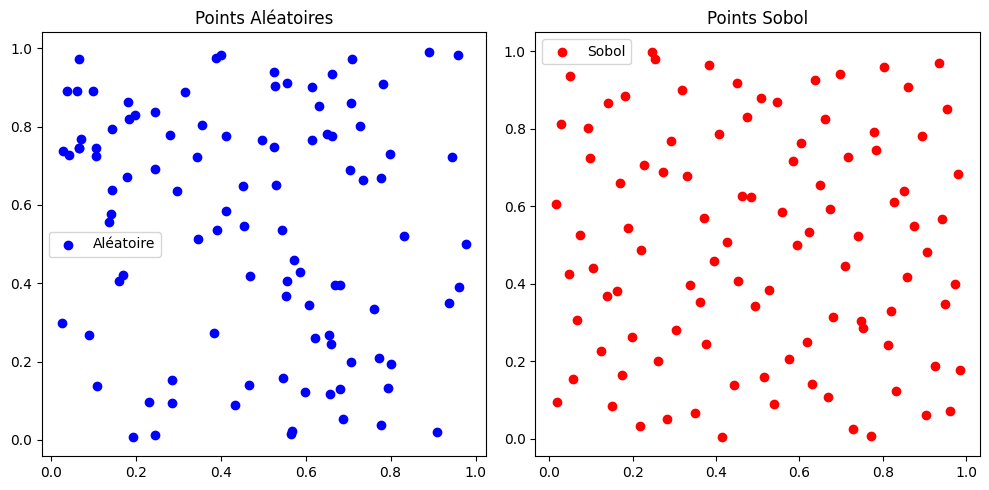

In [45]:
def random_points(n):
    return np.random.rand(n, 2)

def sobol_points(n):
    sobol = qmc.Sobol(2)
    points = sobol.random(n)
    return points

# Générer des points aléatoires
random = random_points(100)

# Générer des points avec la séquence Sobol
sobol = sobol_points(100)

# Créer un nouveau graphique avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Tracer les points aléatoires
axes[0].scatter(random[:, 0], random[:, 1], color='blue', label='Aléatoire')
axes[0].set_title('Points Aléatoires')

# Tracer les points avec la séquence Sobol
axes[1].scatter(sobol[:, 0], sobol[:, 1], color='red', label='Sobol')
axes[1].set_title('Points Sobol')

# Afficher la légende
for ax in axes:
    ax.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()

### 2.2 Monte Carlo standard et RQMC : algorithmes

Codons une fonction pour estimer l'espérance avec Monte Carlo standard. 

In [46]:
def monte_carlo_estimate(f, n, alpha, beta, gamma, delta):
    w = np.random.exponential(scale=1, size=n)
    u = np.random.uniform(-np.pi/2, np.pi/2, size=n)
    y = levy_stable.rvs(alpha, beta, loc=delta, scale=gamma,size=n)
    return np.mean(f(y))


Maintenant, codons la fonction pour estimer l'espérance avec RQMC. Pour cela, on utilise Sobol pour créer des séquences semi-aléatoires.

In [47]:
def rqmc_estimate(f, n, alpha, beta, gamma, delta):
    d = 1  # Dimension de la séquence
    points = sobol_sequence(n, d)
    u = np.arccos(2 * points - 1) - np.pi/2  # Transformation pour obtenir u entre -pi/2 et pi/2
    w = -np.log(1 - points)  # Transformation pour obtenir w selon une distribution exponentielle
    y = levy_stable.rvs(alpha, beta, loc=delta, scale=gamma,size=n)
    return np.mean(f(y))

In [48]:
alpha = 0.6
beta = 1
gamma = 1
delta = 0

# Nombre d'échantillons
n = 10000

Calculons maintenant les estimations avec Monte Carlo standard et RQMC pour chaque fonction. 

In [49]:
mc_estimate1 = monte_carlo_estimate(f1, n, alpha, beta, gamma, delta)
rqmc_estimate1 = rqmc_estimate(f1, n, alpha, beta, gamma, delta)

mc_estimate2 = monte_carlo_estimate(f2, n, alpha, beta, gamma, delta)
rqmc_estimate2 = rqmc_estimate(f2, n, alpha, beta, gamma, delta)

mc_estimate3 = monte_carlo_estimate(f3, n, alpha, beta, gamma, delta)
rqmc_estimate3 = rqmc_estimate(f3, n, alpha, beta, gamma, delta)

mc_estimate4 = monte_carlo_estimate(f4, n, alpha, beta, gamma, delta)
rqmc_estimate4 = rqmc_estimate(f4, n, alpha, beta, gamma, delta)

print("Monte Carlo Estimate 1:", mc_estimate1)
print("RQMC Estimate 1:", rqmc_estimate1)

print("Monte Carlo Estimate 2:", mc_estimate2)
print("RQMC Estimate 2:", rqmc_estimate2)

print("Monte Carlo Estimate 3:", mc_estimate3)
print("RQMC Estimate 3:", rqmc_estimate3)

print("Monte Carlo Estimate 4:", mc_estimate4)
print("RQMC Estimate 4:", rqmc_estimate4)


Monte Carlo Estimate 1: 238.56732961353632
RQMC Estimate 1: 32528.841053734523
Monte Carlo Estimate 2: 0.17544491018506056
RQMC Estimate 2: 0.17200542411869177
Monte Carlo Estimate 3: 28710000846736.28
RQMC Estimate 3: 58376032.0180934
Monte Carlo Estimate 4: 0.35981588544756443
RQMC Estimate 4: 0.3661691440410305


### 2.3 Comparaison des méthodes

Nous obtenons les graphiques suivants : 

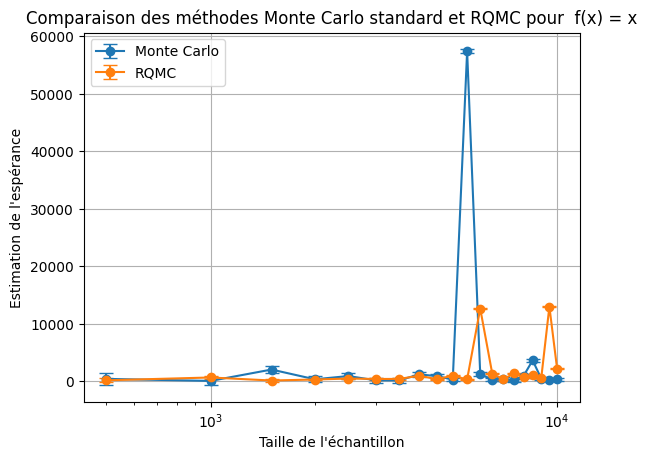

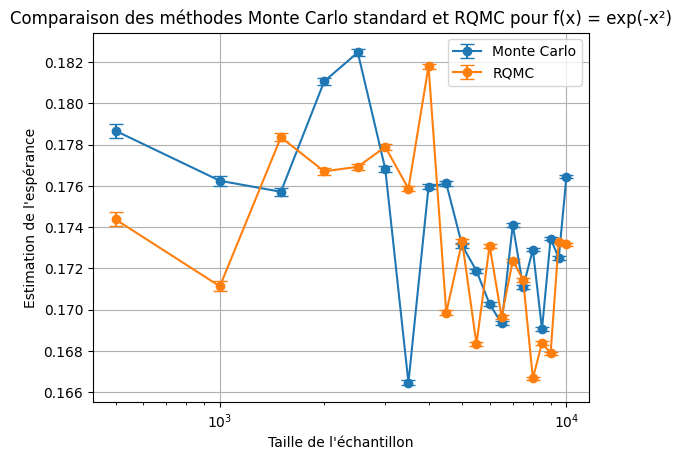

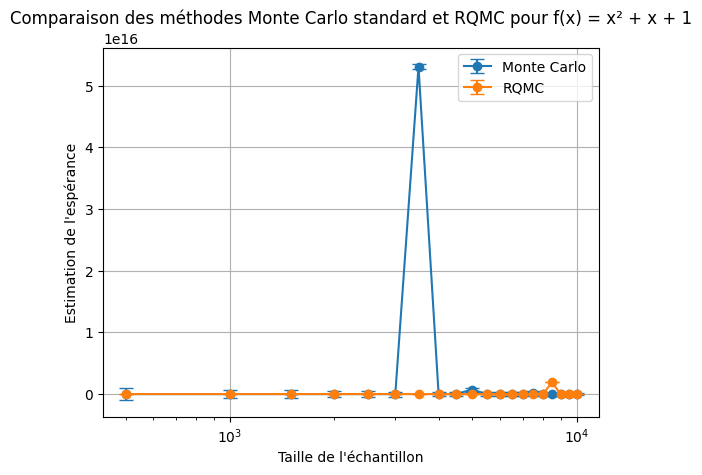

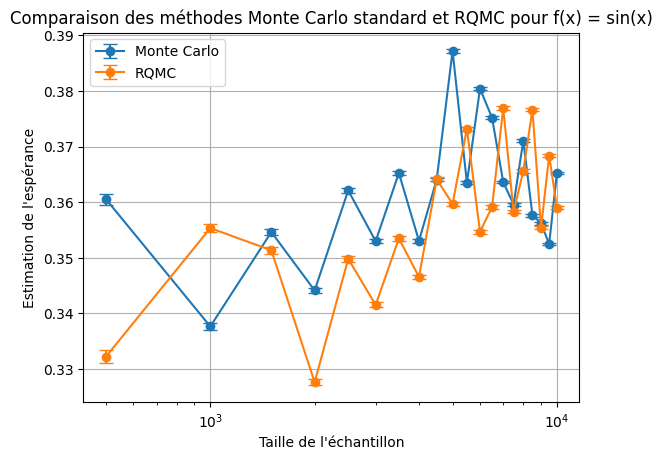

In [50]:
for f in [f1,f2,f3,f4]:
    max_n = 10000
    # Nombre de points à évaluer
    num_points = 20
# Fonctions à évaluer avec leurs noms correspondants
functions = [(f1, ' f(x) = x'), (f2, 'f(x) = exp(-x²)'), (f3, 'f(x) = x² + x + 1'), (f4, 'f(x) = sin(x)')]

# Calcul et tracé des résultats pour chaque fonction
for f, name in functions:
    # Tableaux pour stocker les résultats
    mc_estimates = np.zeros(num_points)
    rqmc_estimates = np.zeros(num_points)
    sample_sizes = np.zeros(num_points)

    # Calcul des estimations pour différentes tailles d'échantillons
    for i in range(num_points):
        n = (i + 1) * (max_n // num_points)
        sample_sizes[i] = n
        mc_estimates[i] = monte_carlo_estimate(f, n, alpha, beta, gamma, delta)
        rqmc_estimates[i] = rqmc_estimate(f, n, alpha, beta, gamma, delta)

    # Calcul des intervalles de confiance
    mc_std_err = np.std(mc_estimates) / np.sqrt(sample_sizes)
    rqmc_std_err = np.std(rqmc_estimates) / np.sqrt(sample_sizes)
    mc_conf_interval = 1.96 * mc_std_err  # Intervalle de confiance à 95%
    rqmc_conf_interval = 1.96 * rqmc_std_err  # Intervalle de confiance à 95%

    # Tracé des résultats
    plt.errorbar(sample_sizes, mc_estimates, yerr=mc_conf_interval, label='Monte Carlo', fmt='o-', capsize=5)
    plt.errorbar(sample_sizes, rqmc_estimates, yerr=rqmc_conf_interval, label='RQMC', fmt='o-', capsize=5)
    plt.xscale('log')
    plt.xlabel('Taille de l\'échantillon')
    plt.ylabel('Estimation de l\'espérance')
    plt.title('Comparaison des méthodes Monte Carlo standard et RQMC pour ' + name)
    plt.legend()
    plt.grid(True)
    plt.show()

D'après les graphiques, on peut tirer certaines conjectures. En effet, la variance de l'estimation de l'espérance par la méthode RQMC est généralement plus faible que celle du Monte Carlo standard. De plus, les deux méthodes convergent vers une valeur similaire, ce qui est attendu avec la loi des grands nombres. Cependant, la convergence avec RQMC semble être plus rapide. 

#### 2.3.1 Comparaison des MSE

In [51]:
functions2 = [(f4, 'f(x) = sin(x)'), (f2, 'f(x) = exp(-x²)'),]

for f, name in functions2:
    # Tableaux pour stocker les résultats
    mc_estimates = np.zeros(num_points)
    rqmc_estimates = np.zeros(num_points)
    sample_sizes = np.zeros(num_points)

    # Calcul des estimations pour différentes tailles d'échantillons
    for i in range(num_points):
        n = (i + 1) * (max_n // num_points)
        sample_sizes[i] = n
        mc_estimates[i] = monte_carlo_estimate(f, n, alpha, beta, gamma, delta)
        rqmc_estimates[i] = rqmc_estimate(f, n, alpha, beta, gamma, delta)

    # Calcul des vraies valeurs (ou approximation)
    true_values = np.zeros(num_points)  # À remplir avec les vraies valeurs si disponibles

    # Calcul des erreurs pour chaque méthode
    mc_errors = mc_estimates - true_values
    rqmc_errors = rqmc_estimates - true_values

    # Calcul de la MSE pour chaque méthode
    mc_mse = np.mean(mc_errors**2)
    rqmc_mse = np.mean(rqmc_errors**2)

    # Affichage de la MSE
    print(f"MSE Monte Carlo pour {name}: {mc_mse}")
    print(f"MSE RQMC pour {name}: {rqmc_mse}")


MSE Monte Carlo pour f(x) = sin(x): 0.13306096861025846
MSE RQMC pour f(x) = sin(x): 0.13057903004369176
MSE Monte Carlo pour f(x) = exp(-x²): 0.030251038205647812
MSE RQMC pour f(x) = exp(-x²): 0.030092009270705912


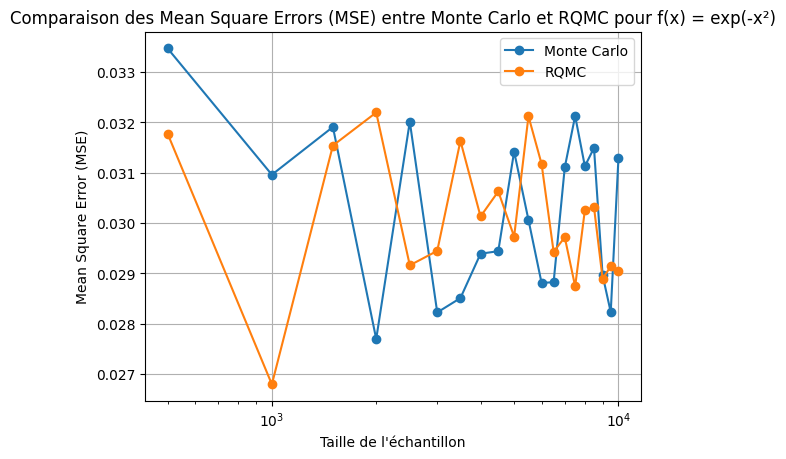

In [52]:
# Calcul des MSE pour chaque méthode
mc_mse_values = np.zeros(num_points)
rqmc_mse_values = np.zeros(num_points)

for i in range(num_points):
    mc_mse_values[i] = np.mean((mc_estimates[i] - true_values)**2)  # Calcul de la MSE pour Monte Carlo
    rqmc_mse_values[i] = np.mean((rqmc_estimates[i] - true_values)**2)  # Calcul de la MSE pour RQMC

# Tracé des courbes MSE pour chaque méthode
plt.plot(sample_sizes, mc_mse_values, label='Monte Carlo', marker='o')
plt.plot(sample_sizes, rqmc_mse_values, label='RQMC', marker='o')

plt.xscale('log')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Comparaison des Mean Square Errors (MSE) entre Monte Carlo et RQMC pour f(x) = exp(-x²)')
plt.legend()
plt.grid(True)
plt.show()


On voit que pour cette fonction, la RQMC donne une plus petite MSE. 

#### 2.3.2 Comparaison des variances

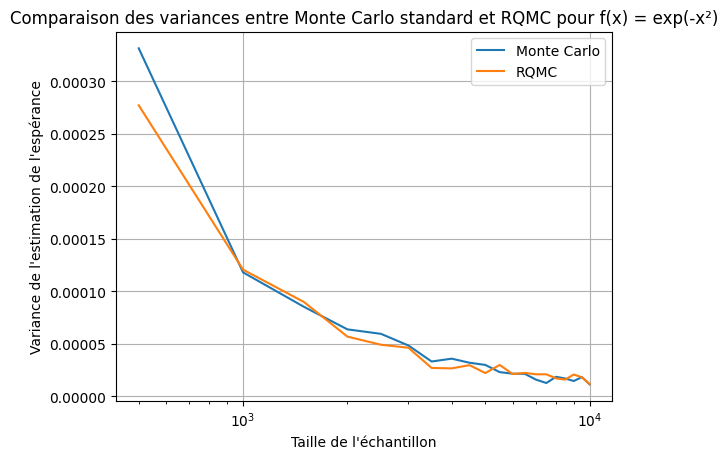

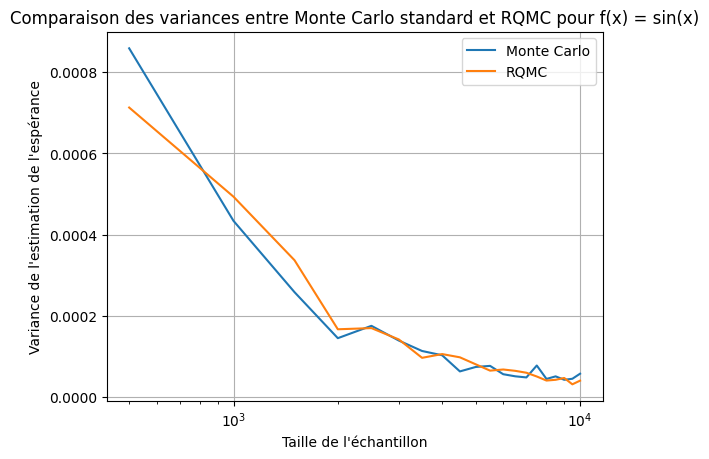

In [53]:
alpha = 1.5
beta = 0
gamma = 1
delta = 1

num_points = 20
max_n = 10000

functions = [(f2, 'f(x) = exp(-x²)'), (f4, 'f(x) = sin(x)')]

for f, name in functions:
    mc_variances = np.zeros(num_points)
    rqmc_variances = np.zeros(num_points)
    sample_sizes = np.zeros(num_points)

    for i in range(num_points):
        n = (i + 1) * (max_n // num_points)
        sample_sizes[i] = n

        # Estimations pour chaque méthode
        mc_estimates = np.array([monte_carlo_estimate(f, n, alpha, beta, gamma, delta) for _ in range(100)])  # 100 estimations pour calculer la variance
        rqmc_estimates = np.array([rqmc_estimate(f, n, alpha, beta, gamma, delta) for _ in range(100)])

        # Calcul des variances
        mc_variances[i] = np.var(mc_estimates)
        rqmc_variances[i] = np.var(rqmc_estimates)

    # Tracé des résultats
    plt.plot(sample_sizes, mc_variances, label='Monte Carlo')
    plt.plot(sample_sizes, rqmc_variances, label='RQMC')
    plt.xscale('log')
    plt.xlabel('Taille de l\'échantillon')
    plt.ylabel('Variance de l\'estimation de l\'espérance')
    plt.title('Comparaison des variances entre Monte Carlo standard et RQMC pour ' + name)
    plt.legend()
    plt.grid(True)
    plt.show() 


Ainsi, la variance est souvent plus basse pour le RQMC pour un nombre d'échantillons croissant.